<div align="right">Revision 1A : January 2021</div>
<div align="left">Embedded Systems & IoT courses
<br>Instructor : Dr.Varodom Toochinda
<br>Dept. of Mechanical Engineering, Kasetsart University
</div>    

<a href="https://colab.research.google.com/github/dewdotninja/embedded_iot/blob/master/hws/HW2en_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For colab user, install additional libraries
!pip install slycot
!pip install control

In [1]:
# You can import the libraries here or elsewhere in this notebook.
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

## HW#2

<b>2.1</b>
<ul>
<li />Design a passive LPF with cutoff frequency = 5 Hz (31.43 rad/s) using RC circuit as in Figure 2.1. 
<li />Plot frequency response (Bode plot) to verify the cutoff frequency.
</ul>
<p align="center">
<img src="https://drive.google.com/uc?id=1mW_6IREpdA-AWzwoKimafdWf-RYNm9Iq" alt="Figure 2.1"/>
</p>
<div align="center"><b>Figure 2.1 a passive LPF using RC circuit</b></div>


### Solution

In [3]:
# define cutoff frequency
f = 5
om = 2*np.pi*f
om

31.41592653589793

Select R, C values from
$$
\Omega_o = \frac{1}{RC} = 31.4 
$$

In [7]:
# For example, choose C = 1 uF. Compute R
C = 1e-6
R = 1/(om*C)
R

31830.988618379073

So choose C = $1 \mu F$, R = $31830 \Omega$. (In practice, may choose closest value in the market, say, $32 K\Omega$)

Plot Bode frequency response to verify the cutoff frequency.

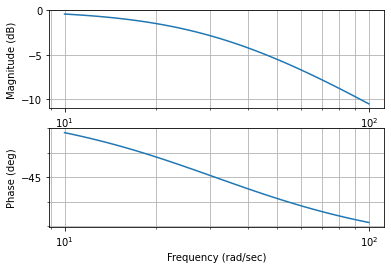

In [9]:
R = 32000 # choose available resistor in the market
# Form transfer function
num = 1
den = [R*C, 1]
H = ctl.tf(num,den)
mag, ph, om = ctl.bode_plot(H, dB = True,omega_limits=[10,100])

It can be seen that the magnitude drops to -3 dB at frequency around 30 rad/s. 

<b>2.2</b>

<p align="center">
<img src="https://drive.google.com/uc?id=1UAN5YaNO73tCqpjesO90FUdkwUYR4Aa5" width=700 alt="Figure 2.2"/>
</p>
<ul>
<li />Verify the design by generating a $\pm$ 0.5 volt sinusoid wave input. The output should swing within 0 - 3 volts.
Plot both input and output waveforms.
</ul>

### Solution

The output of level shifter is dictated by the following equation
$$
V_{out} = \Big(\frac{R_4}{R_3+R_4}\Big)\Big(1+\frac{R_2}{R_1}\Big)V_{in} - \Big(\frac{R_2}{R_1}\Big)V_B
$$
<div align="right">(1)</div>
with mapping


| Input | Output |
| --- | --- |
| 0.5 V | 3 V |
| 0 V | 1.5 V |
| -0.5V | 0 V |

But notice that for this problem, the input range is smaller than the output range, so the voltage divider at the input is 
not needed; i.e., we can safely get rid of $R_3$ and $R_4$. (1) reduces to

$$
V_{out} = \Big(1+\frac{R_2}{R_1}\Big)V_{in} - \Big(\frac{R_2}{R_1}\Big)V_B
$$
<div align="right">(2)</div>

Let's begin with $V_{in} = 0$. From (2) we have
$$
V_{out} = -\Big(\frac{R_2}{R_1}\Big)V_B = 1.5
$$

This yields 

$$
\frac{R_2}{R_1} = -\frac{1.5}{V_B}
$$
<div align="right">(3)</div>

Substitue (3) to (2) and use, say, row 1 of the mapping to get
$$
3 = 0.5\Big(1 - \frac{1.5}{V_B}\Big) + 1.5
$$
<div align="right">(4)</div>

Hence, $V_B$ = -0.75 Volts. Substitute back to (3) yields $R_2 = 2R_1$.

Choose $R_1 = 10 K\,\Omega$, $R_2 = 20 K\,\Omega$ This design is verified by the plot below


In [6]:
Vb = -0.75
R1 = 10000;
R2 = 20000;

tvec = np.arange(0,1,0.01)
om = 10
Vin = 0.5*np.sin(om*tvec)
Vout = (1+R2/R1)*Vin - (R2/R1)*Vb #(2)

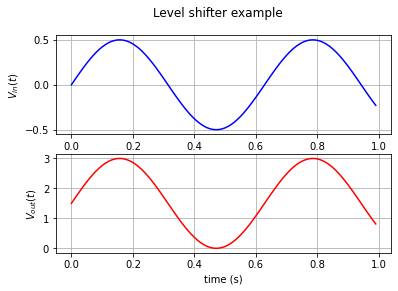

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Level shifter example')
ax1.plot(tvec,Vin,'b-')
ax1.grid(True)
ax1.set_ylabel('$V_{in}(t)$')
ax2.plot(tvec,Vout,'r-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('$V_{out}(t)$')
ax2.grid(True)


In [19]:
max(Vout)

2.9993604045622577

In [20]:
min(Vout)

0.00011511365384864192